In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
biometric_df = pd.read_csv("../cleaned_csv/biometric_clean.csv", parse_dates=['date'])
demographic_df = pd.read_csv("../cleaned_csv/demographic_clean.csv", parse_dates=['date'])
enrolment_df = pd.read_csv("../cleaned_csv/enrolment_clean.csv", parse_dates=['date'])

In [4]:
biometric_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,total_biometric_updates
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,2025,3,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,2025,3,513
2,2025-03-01,Jammu And Kashmir,Poonch,185101,643,1091,2025,3,1734
3,2025-03-01,Bihar,Bhojpur,802158,256,980,2025,3,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,2025,3,1086


In [5]:
demographic_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,total_demo_updates
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,2025,3,578
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,2025,3,397
2,2025-03-01,Gujarat,Rajkot,360006,65,765,2025,3,830
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,2025,3,338
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,2025,3,830


In [6]:
enrolment_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2025,3,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,2025,3,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,2025,3,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,2025,3,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,2025,3,51


# UIDAI Data Plotting
Visualize trends and patterns across enrolment, biometric, and demographic datasets.

In [16]:
# Prep aggregated metrics and monthly period
sns.set(style='whitegrid')

# Ensure total columns exist
if 'total_enrolment' not in enrolment_df.columns:
    enrolment_df['total_enrolment'] = enrolment_df[['age_0_5', 'age_5_17', 'age_18_greater']].sum(axis=1, min_count=1)
if 'total_biometric_updates' not in biometric_df.columns:
    biometric_df['total_biometric_updates'] = biometric_df[['bio_age_5_17', 'bio_age_17_']].sum(axis=1, min_count=1)
if 'total_demo_updates' not in demographic_df.columns:
    demographic_df['total_demo_updates'] = demographic_df[['demo_age_5_17', 'demo_age_17_']].sum(axis=1, min_count=1)

# Monthly period
for df in (enrolment_df, biometric_df, demographic_df):
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

## Monthly Time Series
Compare monthly totals of enrolment, biometric updates, and demographic updates.

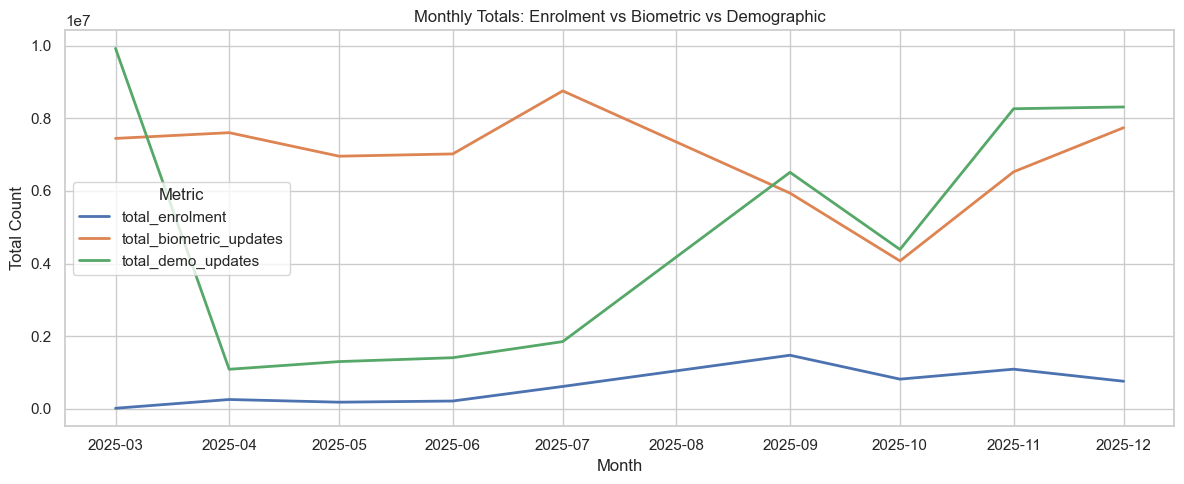

In [17]:
# Build combined monthly totals
enr_m = enrolment_df.groupby('month', as_index=False)['total_enrolment'].sum()
bio_m = biometric_df.groupby('month', as_index=False)['total_biometric_updates'].sum()
dem_m = demographic_df.groupby('month', as_index=False)['total_demo_updates'].sum()

ts = enr_m.merge(bio_m, on='month', how='outer').merge(dem_m, on='month', how='outer').sort_values('month')
ts = ts.fillna(0)
ts_melt = ts.melt(id_vars='month', var_name='metric', value_name='value')

plt.figure(figsize=(12,5))
sns.lineplot(data=ts_melt, x='month', y='value', hue='metric', linewidth=2)
plt.title('Monthly Totals: Enrolment vs Biometric vs Demographic')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Top States by Totals
Rank states by total enrolment, biometric updates, and demographic updates.

C:\Users\arunv\AppData\Local\Temp\ipykernel_18408\2445454650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=enr_states, y='state', x='total_enrolment', palette='Blues_r')


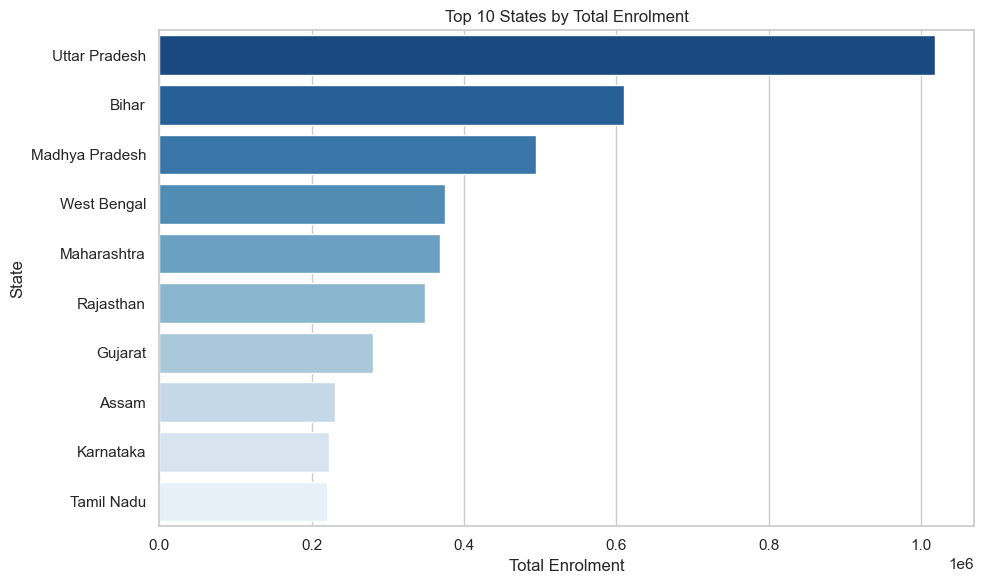

C:\Users\arunv\AppData\Local\Temp\ipykernel_18408\2445454650.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bio_states, y='state', x='total_biometric_updates', palette='Greens_r')


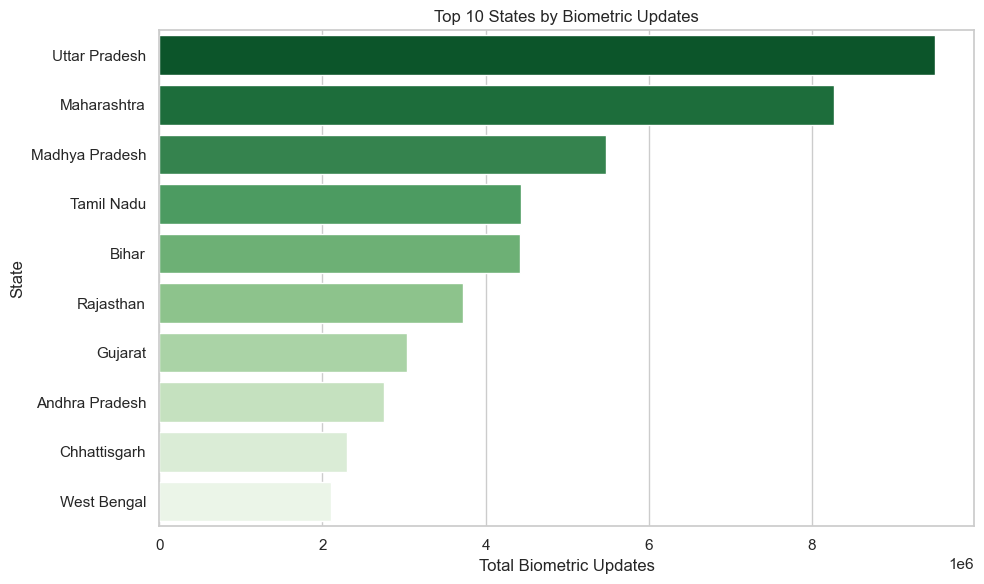

C:\Users\arunv\AppData\Local\Temp\ipykernel_18408\2445454650.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dem_states, y='state', x='total_demo_updates', palette='Oranges_r')


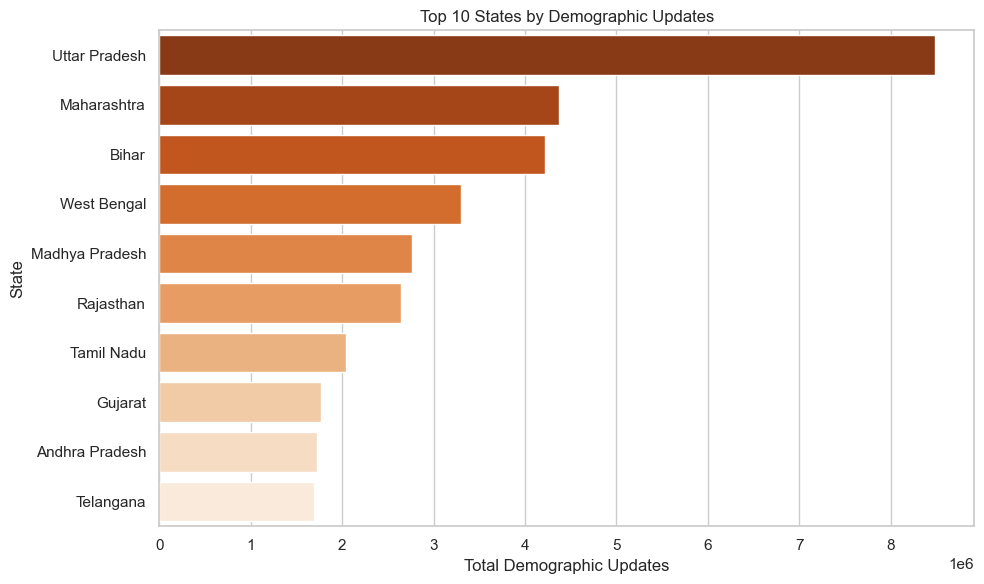

In [18]:
# Top 10 states by enrolment
enr_states = (
    enrolment_df.groupby('state', as_index=False)['total_enrolment'].sum()
    .sort_values('total_enrolment', ascending=False).head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(data=enr_states, y='state', x='total_enrolment', palette='Blues_r')
plt.title('Top 10 States by Total Enrolment')
plt.xlabel('Total Enrolment')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Top 10 states by biometric updates
bio_states = (
    biometric_df.groupby('state', as_index=False)['total_biometric_updates'].sum()
    .sort_values('total_biometric_updates', ascending=False).head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(data=bio_states, y='state', x='total_biometric_updates', palette='Greens_r')
plt.title('Top 10 States by Biometric Updates')
plt.xlabel('Total Biometric Updates')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Top 10 states by demographic updates
dem_states = (
    demographic_df.groupby('state', as_index=False)['total_demo_updates'].sum()
    .sort_values('total_demo_updates', ascending=False).head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(data=dem_states, y='state', x='total_demo_updates', palette='Oranges_r')
plt.title('Top 10 States by Demographic Updates')
plt.xlabel('Total Demographic Updates')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Monthly Heatmap (Top States)
Heatmap of monthly enrolment across top states (by total).

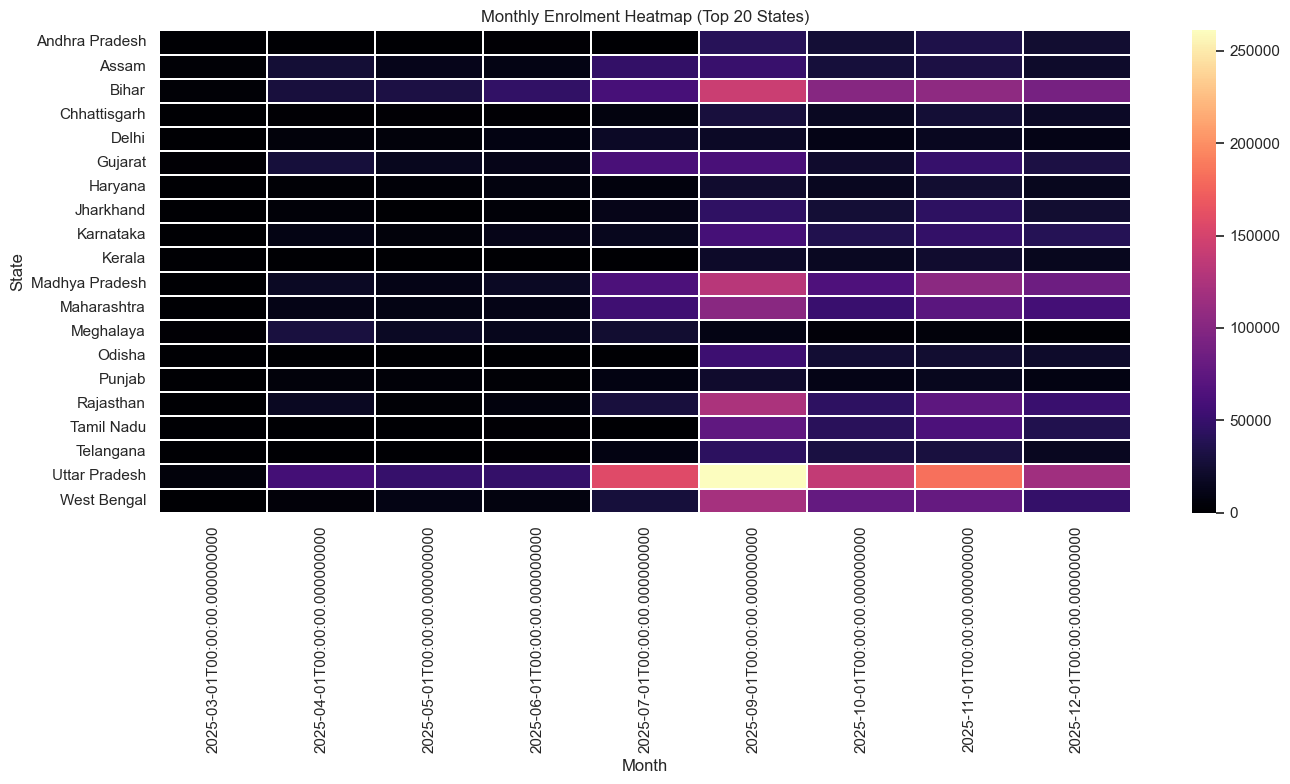

In [19]:
# Pick top 20 states by enrolment total to keep heatmap readable
top_states = (
    enrolment_df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False).head(20).index
)
enr_top = enrolment_df[enrolment_df['state'].isin(top_states)]
enr_pivot = enr_top.groupby(['state','month'])['total_enrolment'].sum().reset_index()
heat = enr_pivot.pivot(index='state', columns='month', values='total_enrolment').fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(heat, cmap='magma', linewidths=0.3)
plt.title('Monthly Enrolment Heatmap (Top 20 States)')
plt.xlabel('Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Age-group Contributions Over Time
Stacked area plot showing enrolment contributions by age groups.

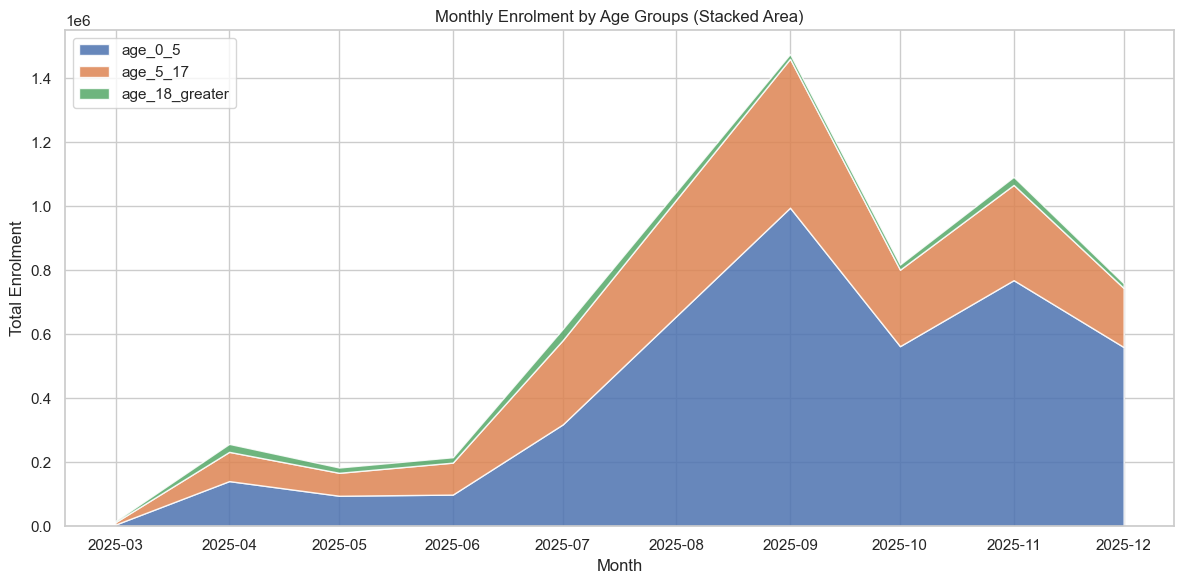

In [20]:
# Aggregate age groups by month
age_cols = [c for c in ['age_0_5', 'age_5_17', 'age_18_greater'] if c in enrolment_df.columns]
age_m = enrolment_df.groupby('month')[age_cols].sum().reset_index()

plt.figure(figsize=(12,6))
plt.stackplot(
    age_m['month'],
    *[age_m[c].values for c in age_cols],
    labels=age_cols,
    alpha=0.85
)
plt.title('Monthly Enrolment by Age Groups (Stacked Area)')
plt.xlabel('Month')
plt.ylabel('Total Enrolment')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()